<a href="https://colab.research.google.com/github/zee404-code/DartsTimeSeries/blob/main/darts03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install darts

In [ ]:
from darts.datasets import HeartRateDataset


In [ ]:
from darts.models import StatsForecastAutoARIMA

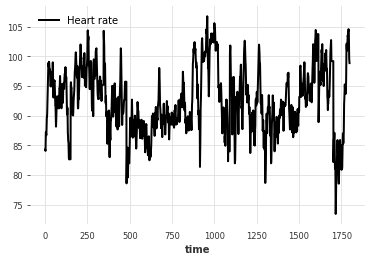

In [ ]:
series = HeartRateDataset().load()
series.plot()

In [ ]:
train, test = series.split_before(0.66)
print(len(series))
print(len(train))
print(len(test))

1800
1187
613


In [ ]:
print(series.mean(axis=0))

<TimeSeries (DataArray) (time: 1, component: 1, sample: 1)>
array([[[92.59611439]]])
Coordinates:
  * time       (time) int64 0
  * component  (component) object 'Heart rate'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


In [ ]:
#print(series.var(ddof=1))

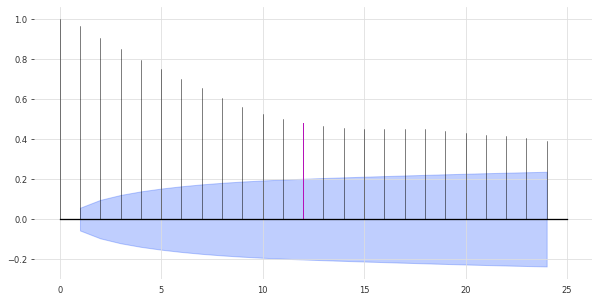

In [ ]:
from darts.utils.statistics import plot_acf, check_seasonality

plot_acf(train, m=12, alpha=0.05)

In [ ]:
for m in range(2, 25):
    is_seasonal, period = check_seasonality(train, m=m, alpha=0.05)
    if is_seasonal:
        print("There is seasonality of order {}.".format(period))

There is seasonality of order 17.


In [ ]:
data = train
for m in range(1, 18):
  data = data.diff()

for m in range(2, 25):
    is_seasonal, period = check_seasonality(train.diff().diff(), m=m, alpha=0.05)
    if is_seasonal:
        print("There is seasonality of order {}.".format(period))

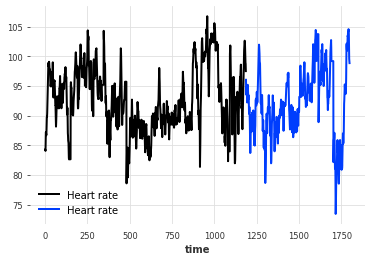

In [ ]:
train.plot()
test.plot()

In [ ]:
from darts.models import ARIMA, AutoARIMA #, VARIMA

In [ ]:
from darts.metrics import mape, coefficient_of_variation, dtw_metric, mae, marre, mase, mse, ope, r2_score, rho_risk, rmse, rmsle, smape
def eval_models_mape(model):
  model.fit(train)
  pred = model.predict(len(test))
  #print("model {} obtains MAPE: {:.2f}%".format(model, mape(test, pred)))
  return "{}    {:.2f}%".format(model, mape(test, pred))
eval_models_mape(ARIMA())

'ARIMA(12, 1, 0)    7.87%'

In [ ]:
def eval_models_mae(model):
  model.fit(train)
  pred = model.predict(len(test))
  return("{}    {:.2f}%".format(model, mae(test, pred)))

eval_models_mae(ARIMA())

'ARIMA(12, 1, 0)    6.96%'

In [ ]:
def eval_models_cov(model):
  model.fit(train)
  pred = model.predict(len(test))
  return("{}   {:.2f}%".format(model, coefficient_of_variation(test, pred)))

eval_models_cov(ARIMA())

'ARIMA(12, 1, 0)   9.05%'

In [ ]:
def eval_models_dtw(model):
  model.fit(train)
  pred = model.predict(len(test))
  return("{}   {:.2f}%".format(model, dtw_metric(test, pred)))

eval_models_dtw(ARIMA())

'ARIMA(12, 1, 0)   3.64%'

In [ ]:
def eval_models_marre(model):
  model.fit(train)
  pred = model.predict(len(test))
  return("{}   {:.2f}%".format(model, marre(test, pred)))

eval_models_marre(ARIMA())

'ARIMA(12, 1, 0)   22.35%'

In [ ]:
#def eval_models_mase(model):
  #model.fit(train)
  #pred = model.predict(len(test))
  #insample = 
  #return("model {} obtains MASE: {:.2f}%".format(model, mase(test, pred, insample)))

#eval_models_mase(ARIMA())

In [ ]:
def eval_models_mse(model):
  model.fit(train)
  pred = model.predict(len(test))
  return("{}    {:.2f}%".format(model, mse(test, pred)))

#eval_models_mse(ARIMA())

##### was giving an output of 4559.79%
## doesnt work for a single series

In [ ]:
def eval_models_ope(model):
  model.fit(train)
  pred = model.predict(len(test))
  return("{}   {:.2f}%".format(model, ope(test, pred)))

eval_models_ope(ARIMA())

'ARIMA(12, 1, 0)   6.50%'

In [ ]:
def eval_models_r2_score(model):
  model.fit(train)
  pred = model.predict(len(test))
  return("{}   {:.2f}%".format(model, r2_score(test, pred)))

eval_models_r2_score(ARIMA())

'ARIMA(12, 1, 0)   -1.07%'

In [ ]:
def eval_models_rho_risk(model):
  model.fit(train)
  pred = model.predict(len(test))
  return("{}    {:.2f}%".format(model, rho_risk(test, pred)))
  
#eval_models_rho_risk(ARIMA())

#### only works for stochastic predicted TimeSeries

In [ ]:
def eval_models_rmse(model):
  model.fit(train)
  pred = model.predict(len(test))
  return("{}   {:.2f}%".format(model, rmse(test, pred)))

eval_models_rmse(ARIMA())

'ARIMA(12, 1, 0)   8.35%'

In [ ]:
def eval_models_rmsle(model):
  model.fit(train)
  pred = model.predict(len(test))
  return("{}   {:.2f}%".format(model, rmsle(test, pred)))

eval_models_rmsle(ARIMA())

'ARIMA(12, 1, 0)   0.09%'

In [ ]:
def eval_models_smape(model):
  model.fit(train)
  pred = model.predict(len(test))
  return("{}   {:.2f}%".format(model, smape(test, pred)))

eval_models_smape(ARIMA())

'ARIMA(12, 1, 0)   7.45%'

In [ ]:
#model = VARIMA()
#model.fit(train)

#this works, but not working with this at the moment

In [ ]:
#eval_models(VARIMA())         can't directly do varima, however the codes below would run for 
#multivariate datasets and the one I have is univariate. 

#from darts.dataprocessing.transformers import Scaler

#multi_series = HeartRateDataset().load()
#training_set, validation_set = multi_series.split_before(0.66)

#scaler_dataset = Scaler()

#def fit_and_pred(model, training, validation):
   # model.fit(training)
  #  forecast = model.predict(len(validation))
 #   return forecast

#training_scaled = scaler_dataset.fit_transform(training_set)
#validation_scaled = scaler_dataset.transform(validation_set)

#model_VARIMA = VARIMA(p=12, d=0, q=0, trend = "n")

# training and prediction with the VARIMA model

#forecast_VARIMA = fit_and_pred(model_VARIMA, training_scaled, validation_scaled)

#print("MAPE (VARIMA) = {:.2f}".format(mape(validation_scaled, forecast_VARIMA)))
#forecast_VARIMA = scaler_dataset.inverse_transform(forecast_VARIMA)

In [ ]:
eval_models_mape(AutoARIMA())

'Auto-ARIMA    5.82%'

In [ ]:
import pandas as pd
metrics = {}
metrics['MAPE'] = eval_models_mape(ARIMA()) 
metrics['COFFECIENT OF VARIATION'] = eval_models_cov(ARIMA())
metrics['DTW METRIC'] = eval_models_dtw(ARIMA())
metrics['MAE'] = eval_models_mae(ARIMA())
metrics['MARRE'] = eval_models_marre(ARIMA())
metrics['MASE'] = "doesnt work" #eval_models_mase(ARIMA())
metrics['MSE'] = "doesnt work"##eval_models_mse(ARIMA())
metrics['OPE'] = eval_models_ope(ARIMA())
metrics['R2 SCORE'] = eval_models_r2_score(ARIMA())
metrics['RHO RISK'] = "doesnt work" #eval_models_rho_risk(ARIMA())
metrics['RMSE'] = eval_models_rmse(ARIMA())
metrics['RMSLE'] = eval_models_rmsle(ARIMA())
metrics['SMAPE'] = eval_models_smape(ARIMA())

df = pd.DataFrame.from_dict(metrics, orient='index')

In [ ]:
col1 = ['METRICS', 'MAPE', 'COFFECIENT OF VARIATION','DTW METRIC', 'MAE', 'MARRE', 'MASE',
        'MSE', 'OPE', 'R2 SCORE', 'RHO RISK', 'RMSE', 'RMSLE', 'SMAPE']

In [ ]:
col2 = ['ARIMA', eval_models_mape(ARIMA()), eval_models_cov(ARIMA()), eval_models_dtw(ARIMA()),
eval_models_mae(ARIMA()), eval_models_marre(ARIMA()) , "doesnt work", "doesnt work" , 
eval_models_ope(ARIMA()), eval_models_r2_score(ARIMA()), "doesnt work", 
eval_models_rmse(ARIMA()), eval_models_rmsle(ARIMA()), eval_models_smape(ARIMA())]


In [ ]:
col3 = ['AutoARIMA', eval_models_mape(AutoARIMA()), eval_models_cov(AutoARIMA()), eval_models_dtw(AutoARIMA()),
eval_models_mae(AutoARIMA()), eval_models_marre(AutoARIMA()) , 'doesnt work', 
eval_models_mse(AutoARIMA()) , eval_models_ope(AutoARIMA()), eval_models_r2_score(AutoARIMA()),
 'doesnt work', eval_models_rmse(AutoARIMA()), eval_models_rmsle(AutoARIMA()),
  eval_models_smape(AutoARIMA())]


In [ ]:
col4 = ['StatsForecastAutoARIMA', eval_models_mape(StatsForecastAutoARIMA()), eval_models_cov(StatsForecastAutoARIMA()), eval_models_dtw(StatsForecastAutoARIMA()),
eval_models_mae(StatsForecastAutoARIMA()), eval_models_marre(StatsForecastAutoARIMA()) , 'doesnt work', 
eval_models_mse(StatsForecastAutoARIMA()) , eval_models_ope(StatsForecastAutoARIMA()), eval_models_r2_score(StatsForecastAutoARIMA()),
 'doesnt work', eval_models_rmse(StatsForecastAutoARIMA()), eval_models_rmsle(StatsForecastAutoARIMA()),
  eval_models_smape(StatsForecastAutoARIMA())]


In [ ]:
df = pd.DataFrame()
df = pd.DataFrame(col2, col1)
df.insert(0, 1, col3)
df.insert(1, 2, col4)
print(df)

                                            1  \
METRICS                             AutoARIMA   
MAPE                      Auto-ARIMA    5.82%   
COFFECIENT OF VARIATION    Auto-ARIMA   6.94%   
DTW METRIC                 Auto-ARIMA   5.02%   
MAE                       Auto-ARIMA    5.20%   
MARRE                     Auto-ARIMA   16.68%   
MASE                              doesnt work   
MSE                      Auto-ARIMA    40.92%   
OPE                        Auto-ARIMA   2.93%   
R2 SCORE                  Auto-ARIMA   -0.21%   
RHO RISK                          doesnt work   
RMSE                       Auto-ARIMA   6.40%   
RMSLE                      Auto-ARIMA   0.07%   
SMAPE                      Auto-ARIMA   5.63%   

                                                           2  \
METRICS                               StatsForecastAutoARIMA   
MAPE                      Auto-ARIMA-Statsforecasts    7.17%   
COFFECIENT OF VARIATION    Auto-ARIMA-Statsforecasts   8.31%   
DTW METR